<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%204/Compas_Scores_Two_Years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. EDA**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

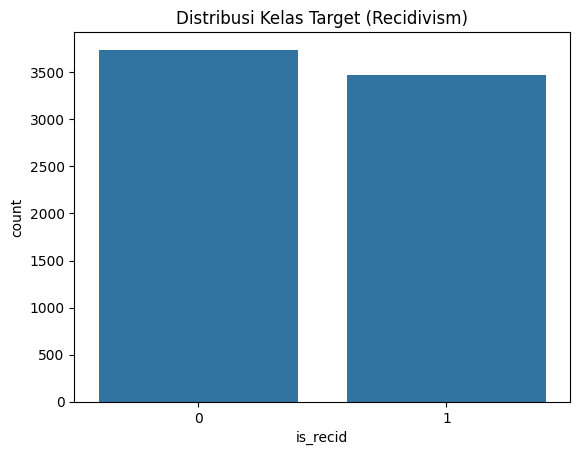

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/compas-scores-two-years.csv")

# Menampilkan informasi dataset
print(df.info())

# Menampilkan 5 baris pertama
print(df.head())

# Cek jumlah nilai yang hilang
print(df.isnull().sum())

# Melihat distribusi variabel target
sns.countplot(data=df, x="is_recid")
plt.title("Distribusi Kelas Target (Recidivism)")
plt.show()


## **2. Feature Engineering**

> Menangani MIssing Values



In [ ]:
# Mengisi nilai yang hilang pada kolom numerik dengan median
df.fillna(df.median(numeric_only=True), inplace=True)

# Mengisi nilai yang hilang pada kolom kategorikal dengan modus
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-7-9ec2d5bfa240>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


> Mengubah Data Kategorikal ke Numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode data kategorikal
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


## **3. Data Visualization**

> Histogram Usia


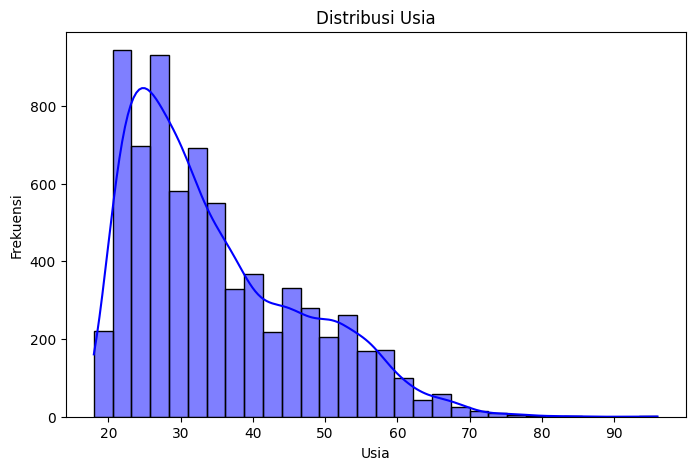

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=30, kde=True, color="blue")
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()


> Korelasi antar Variabel

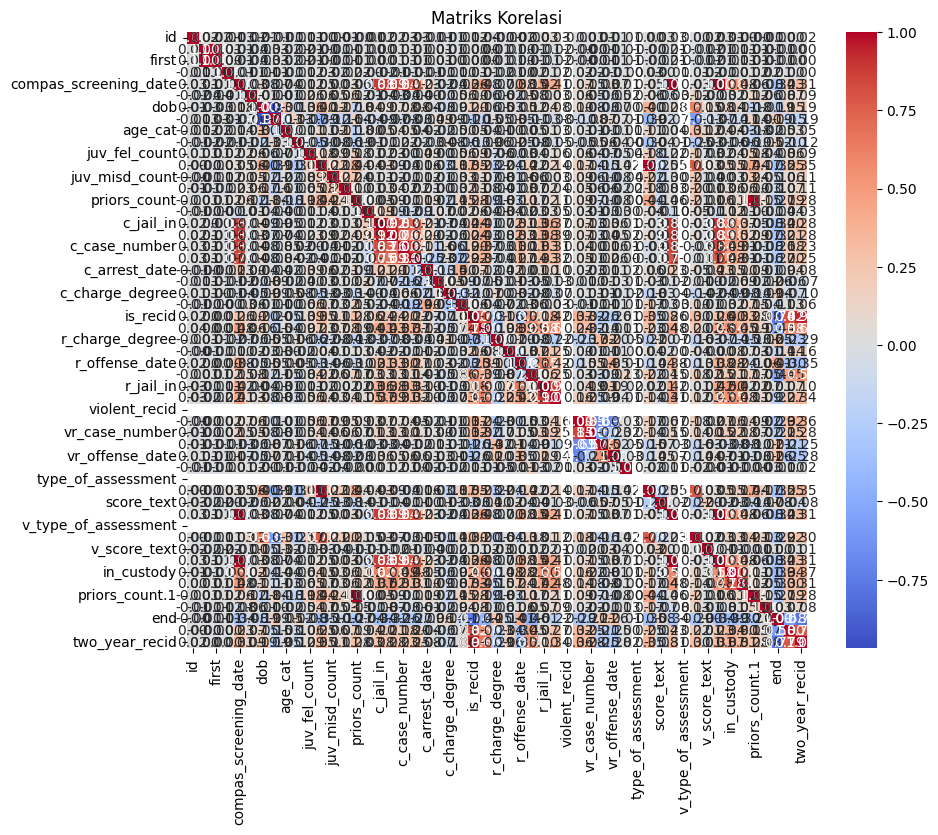

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()


## **4. Evaluasi Model**

> Pisahkan Data Train dan Test

In [ ]:
from sklearn.model_selection import train_test_split

# Definisikan fitur (X) dan target (y)
X = df.drop(columns=["is_recid"])
y = df["is_recid"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


> Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi dan latih model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


> Hitung Matriks Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Akurasi: {accuracy}")
print(f"Presisi: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc}")


Akurasi: 0.9986139986139986
Presisi: 1.0
Recall: 0.9969418960244648
F1-Score: 0.998468606431853
AUC: 0.9984709480122325


> Plot ROC Curve

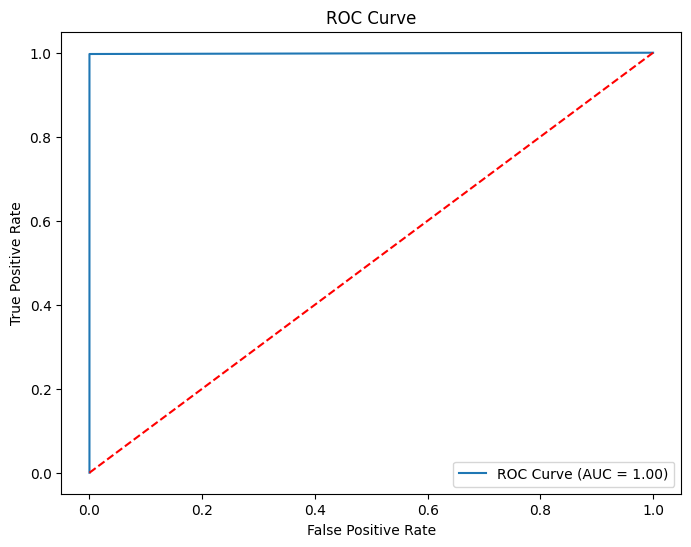

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], "r--")  # Garis diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## **5. Penjelasan Persamaan Matematika**

**Akurasi (Accuracy)**

                Akurasi= TP+TN/TP+TN+FP+FN

Mengukur seberapa sering model memprediksi benar dibandingkan total data.

**Presisi (Precision)**

                 Presisi= TP/TP+FP

Mengukur seberapa banyak prediksi positif yang benar dibandingkan semua prediksi positif.


**Recall (Sensitivity)**

Recall= TP/TP+FN

Mengukur seberapa baik model menangkap semua sampel positif.

**F1-Score**

F1=2× Presisi×Recall/Presisi+Recall

Harmonic mean antara presisi dan recall, berguna jika dataset tidak seimbang.

**AUC-ROC**

* ROC Curve: Grafik antara True Positive Rate (TPR) vs False Positive Rate (FPR)

* AUC (Area Under Curve): Luas di bawah kurva ROC.

Persamaan:

               TPR= TP/TP+FN

               FPR= FP/FP+TN

Nilai AUC:

* 0.5 → Model tidak lebih baik dari tebakan acak.
*0.7-0.8 → Model cukup baik.
*0.8-0.9 → Model sangat baik.
*0.9-1.0 → Model hampir sempurna.